## <div style="text-align:center">Experiment Proposal: Demo Stand versus Printed Flyers as Advertisement Vehicle for the New AR Smart Watch</div> 
### <div style="text-align:center">By Jean-Philippe Pitteloud</div>

#### Business Problem

The management of the anonymous company that owns 45 retail stores is evaluating launching a **New Augmented Reality (AR) Smart Watch** throughout the entire company. Traditionally, the company adverstises its new products along with the week clearance products through a **printed flyer distributed in the store front**. A new marketing team, is proposing the use of a **booth to demo the product to visitors** to allow customers to try the product first hand and encourage them to buy it immediately

#### Proposal

The Data Science team of the company proposes an **A/B testing experiment** to evaluate the effects of the new **demo booth** in boosting the sales of the new product. Based on the problem at hand, it is expected that the average sales for new product ($\mu_{sales}$) will be higher in stores having the **demo booth** (test stores) in comparison to those stores advertising via **printed flyer** (control stores). The information below summarizes our working hypotheses for the experiment:

<div style="text-align:center">$H_{0}: \mu_{sales,test} \le \mu_{sales,control}$</div>

<div style="text-align:center">$H_{1}: \mu_{sales,test} > \mu_{sales,control}$</div>

- **Requirements**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

- **Data Gathering**

The data for this project was manually downloaded from **kaggle** and made available by **Manjeet Singh** (https://www.kaggle.com/manjeetsingh/retaildataset#stores%20data-set.csv). The data comprises three tables containing historical sales data for 45 stores of an anonymous company located in several regions. Each particular store contains a number of departments. A more detailed description of the data contained in every table is offered below

In [2]:
df_stores = pd.read_csv('stores_data_set.csv')

df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


The **stores** table loaded above as **df_stores** Pandas dataframe summarizes anonymized information about the 45 stores, indicating the type and size of store

In [3]:
df_features = pd.read_csv('features_data_set.csv')

df_features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


The **features** table loaded above as **df_features** dataframe contains additional data related to the store, department, and regional activity for the given dates

- Store - the store number
- Date - week of
- Temperature - average temperature in the region
- Fuel_Price - cost of fuel in the region
- MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
- CPI - the consumer price index
- Unemployment - the unemployment rate
- IsHoliday - whether the week is a special holiday week

In [4]:
df_sales = pd.read_csv('sales_data_set.csv')

df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


Last, the third table **sales** reports historical sales data convering the period between 2010-02-05 and 2012-11-01. The data was loaded as a Pandas dataframe **df_sales**

- Store - the store number
- Dept - the department number
- Date - week of
- Weekly_Sales -  sales for the given department in the given store
- IsHoliday - whether the week is a special holiday week

- **Data Assessment and Cleaning**

To ensure the quality of the data before the study, assessment of the datasets was conducted

In [5]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [6]:
df_stores['Store'] = df_stores['Store'].astype(str)
df_features['Store'] = df_features['Store'].astype(str)
df_sales['Store'] = df_sales['Store'].astype(str)

As it can be seen in the summary above, the **df_stores** dataset does not have missing values. To see the distribution of 'store types'the following plot was prepared

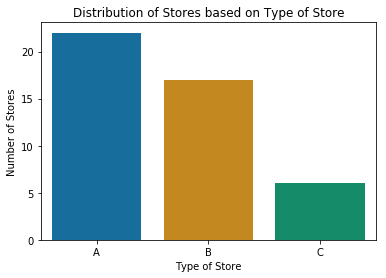

In [7]:
sns.countplot(data = df_stores, x = 'Type', palette = 'colorblind')
plt.title('Distribution of Stores based on Type of Store')
plt.ylabel('Number of Stores')
plt.xlabel('Type of Store');

In the plot above, it is eveident that most of the 45 stores are classified as **Type A** stores, closely followed by **Type B** stores. **Type C** stores are much less common with only a small fraction of all stores belonging to this type

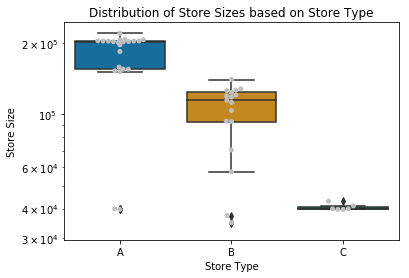

In [8]:
sns.boxplot(data = df_stores, x = 'Type', y = 'Size', palette = 'colorblind')
sns.swarmplot(data = df_stores, x = 'Type', y = 'Size', color=".75")
plt.yscale('log')
plt.title('Distribution of Store Sizes based on Store Type')
plt.ylabel('Store Size')
plt.xlabel('Store Type');

In the chart above, the distribution of the Store Sizes for all three groups of stores is depicted. The lack of overlap between the three groups makes it easier to distinguish them based on this attribute and eventually establish meaningful comparisons among stores classified as the same Store Type. For example, the presence of more than ten **Type A** stores with very similar sizes might be useful for direct comparison during A/B Testing, however, other metrics such as average sales and location might be also taken into account

In [9]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null object
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 13.3+ MB


The summary table above, describes the **df_sales** dataframe as a complete dataset without any missing values. However, in order to be able to work and perform aggregations over a period of time, it is more convenient to format the 'Date' field as 'datetime'. The appropriate conversion of the mentioned field was performed on a copy of the original 'sales' dataset

In [10]:
df_sales_clean = df_sales.copy()

In [11]:
df_sales_clean['Date'] = pd.to_datetime(df_sales_clean['Date'], format = '%d/%m/%Y')

Last, a quick look was taken into the data contained in the **df_features** dataset

In [12]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null object
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), object(2)
memory usage: 711.9+ KB


As it can be seen above, there are multiple fields reporting missing values, while five fields containing information about the store identity, climate, and geoeconomical parameters is quite complete. To simplify the analysis around the different stores, fields with missing values were removed from a copy of the original dataset. To secure consistency with other datasets in the project the 'Date' field format was also changed to 'datetime' data type

In [13]:
df_feat_clean = df_features.copy()

In [14]:
df_feat_clean.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'], axis = 1, inplace = True)

In [15]:
df_feat_clean['Date'] = pd.to_datetime(df_feat_clean['Date'], format = '%d/%m/%Y')

- **Experiment duration:** The experiment would be run for two months during from March 1st and April 30th of the present year. The reason for selecting these dates is the absence of 'Holidays' during the period giving us a good baseline for comparison (see below). 

In [16]:
date_flag = (df_feat_clean['Date'] >= '2010-03-01') & (df_feat_clean['Date'] <= '2010-04-30')

In [17]:
df_feat_clean.loc[date_flag, :]['IsHoliday'].sum()

0

- **Sample selection**: defining the unit (the entity to which the experiment is being applied to) as a **store**, the selection of the **test stores** could be performed taking into account the following metrics: average temperature, average fuel price, store size, store type, and average monthly sales. The averaged metrics would be calculated over the period defined above using historic data. A total of 5 stores would be selected as the **test sample** and 5 other stores would be pair with the test stores using the averaged 'Weekly_Sales' and the store 'Size' (**control sample**). Considering the nature of the proposed experiment, **only Type A** (larger size) stores would be considered to accommodate the needs for physical space. In order to facilitate matching the test and control stores, a master dataset was assembled below and a scatter plot was created to visualize stores with similar metrics. As a more advanced alternative, the use of clustering techniques that will use all the metrics available might be better to find stores that report similar performances and parameters overall

In [18]:
df_temp_fuel = df_feat_clean.loc[date_flag, :].groupby('Store', as_index = False)['Temperature', 'Fuel_Price'].mean()

In [19]:
df_stores2 = df_stores.merge(df_temp_fuel, on = 'Store')

In [20]:
date_flag2 = (df_sales_clean['Date'] >= '2010-03-01') & (df_sales_clean['Date'] <= '2010-04-30')
df_mean_sales = df_sales_clean.loc[date_flag2, :].groupby('Store', as_index = False)['Weekly_Sales'].mean()

In [21]:
df_stores3 = df_stores2.merge(df_mean_sales, on = 'Store')

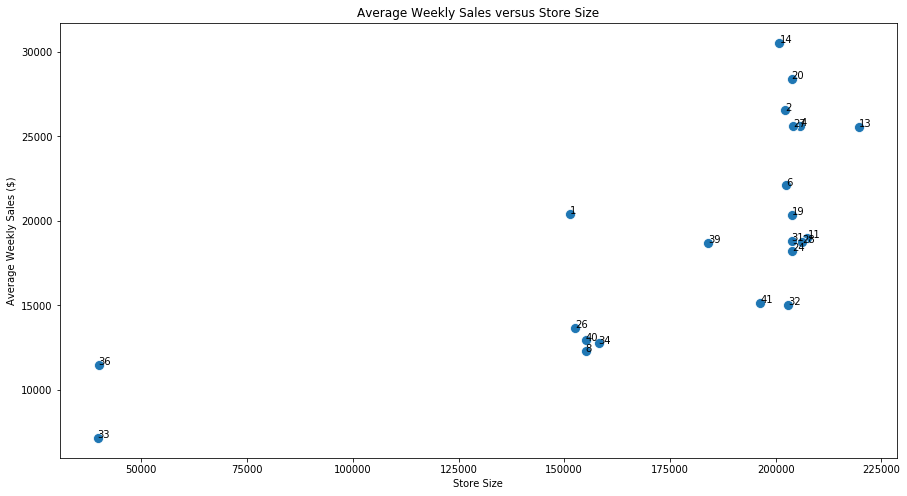

In [22]:
plt.figure(figsize = [15, 8])
ax = sns.scatterplot(data = df_stores3[df_stores3['Type'] == 'A'], x = 'Size', y = 'Weekly_Sales', s = 100)
plt.title('Average Weekly Sales versus Store Size')
plt.ylabel('Average Weekly Sales ($)')
plt.xlabel('Store Size')
df_stores3[df_stores3['Type'] == 'A'][['Size','Weekly_Sales','Store']].apply(lambda x: ax.text(*x),axis=1);

Based on the information displayed in the plot above, five **test stores** were selected and matched against five **control stores**. The matching was based on similarities in terms of average weekly sales and store size for the period of time between 2010-03-01 and 2010-04-30. The use of the other features such as 'Fuel_Price' and 'Temperature' during the selection might be also possible, however, they should not be considered a reliable information regarding store's location. The list of matched stores was then used to create a Pandas Dataframe for future reference and evaluation of the experiment's results

In [23]:
ls = [[41,32], [24, 31], [28, 11], [27, 4], [40, 8]]
store_matched = pd.DataFrame(ls, columns = ['test_store', 'control_store'])

In [24]:
store_matched

,test_store,control_store
0,41,32
1,24,31
2,28,11
3,27,4
4,40,8


- **Experiment execution:** the booths would be delivered by the main office to the management of each **test store** two weeks in advance with instructions about installation and training for personel in charge of the demos. As mentioned above, the experiment would run for two months between March 1st and April 30th of the current year. All operations in selected **control stores** would be run as usual. The **new product sales** will be recorded as the main metric and aggregated daily by adding all sales originated from the new product. As the key metric for the experiment, the **average daily sales** ($\mu_{sales}$) will be calculated by adding all daily sales for the period of the experiment (N = 60 days) and dividing the result by the total number by the following formula:

<br><div style="text-align:center">$\mu_{sales}=\frac{\sum_{i=1}^Nx_{i}}{N}$</div></br>

where $\mu_{sales}$ is the average daily sales, $x_{i}$ is the sale for an individual day, N is the total number of days during the experiment.
Once the **average daily sales** would be calculated, the standard deviation of the sales distribution ($\sigma_{sales}$) would be determined using the following formula

<br><div style="text-align:center">$\sigma_{sales}=\sqrt{\frac{1}{N}\sum_{i=1}^N(x_{i}-\mu_{sales})^2}$</div></br>

where $x_{i}$ corresponds to the daily sales of the new product, N is the total number of days of the experiment, and $\mu_{sales}$ is the average daily sales calculated over the experiment.
At the end of the experiment period, store management should report original sales data collected during the experiment along with the calculated figures of $\mu_{sales}$ and $\sigma_{sales}$ for the new product

- **Experiment evaluation:** the performance of the experiment would be measured by comparing the average daily sales for the new product during the period comprising the experiment for the **test store** group against the same metric for the **control store** group using an **independent two sample t-test**. The following formula will be used to calculate the **t-test value**:
<br><div style="text-align:center">$t=\frac{\mu_{sales,test}-\mu_{sales,control}}{\sqrt{\frac{\sigma_{sales,test}^2}{n_{test}}+\frac{\sigma_{sales,control}^2}{n_{control}}}}$</div></br>
<br>where $\mu_{sales,test}$ and $\mu_{sales,control}$ are the corresponding averaged daily sales for the matching test and control stores, $\sigma_{sales,test}$ and $\sigma_{sales,control}$ are the standard deviations of the respective daily sales, and $n_{test}$ and $n_{control}$ are the number of stores in each group (5 each)</br>
<br></br>
<br>In order to test the validity of our hypotheses, a **p-value** will be determined. The p-value can be defined as the likelihood of obtaining values for the difference of the means of the two groups (test and control) as or more extreme than the actual measured difference. In other words, a p-value would give statistical ground to reject or not the formulated **null hypothesis**, which in this particular case is that the difference of the means would be zero or negligible taking into account pre-defined confidence intervals. Based on the values obtained for average daily sales and the corresponding standard deviation, a distribution of values will be created and the value determined using the calculated t-test values, and the p-values determined. Implementation of the program would be based on a p-value < 0.05, which means that you can be certain with 95% confidence that the measured differences in the means is caused by the test and not by random chance</br>
<br></br>
<br> A final report from the Data Science team shoudl be expected within two weeks from the completion of the experiment</br>

#### References

- I would like to thank **Manjeet Singh** and **kaggle** for sharing the data used for this project (https://www.kaggle.com/manjeetsingh/retaildataset#stores%20data-set.csv)
- Stack overflow and the available documentation for some employed functions and methods were consulted during the project
- I would also like to thank **Karen Farbman** for reviewing this work and giving valuable feedback